<center>
    <h3>University of Toronto</h3>
    <h3>Department of Mechanical and Industrial Engineering</h3>
    <h3>MIE368 Analytics in Action </h3>
    <h3>(Fall 2022)</h3>
    <hr>
    <h1>Lab 1: Introduction to Python, Colab, data engineering, and EDA</h1>
    <h3>September 14, 2022</h3>
</center>


# Introduction
The primary purpose of this lab is to get you comfortable with manipulating data in Python. You will learn how to use a Python package called _Pandas_ to prepare a dataset for analysis. Often, when solving real-world problems (e.g., course project) the data we need is messy and from multiple sources. In its raw form, it is not usually ready for analysis or modeling.

__By the end of this lab you will:__

> i) Have a basic understanding of Colab   

> ii) Understand how to code in Python using a Colab notebook  

> iii) Manipulate data more with _Pandas_    

> iv) Prepare real world data for mathimatical modeling and visualization 

> v) Visualize data   

> vi) Code a simple predictive model

# Colab
_Google Colab_ is a great platform (that you're using right now!) for analytics that doesn't burden your computer, and it makes it easy to code in Python without installing new software on your computer. Colab provides high-quality cloud computing for free, however, your sessions are limited to  12 consecutive hours. Any code that we write in Colab is transferable to other Python coding interfaces that use _iPython Notebooks_ (extension .ipynb), for example, Jupyter Notebook. The notebooks should save automically to you your personal _Google Drive_, but to be safe you can always save it from the _File_ tab at the top left corner of the window. Please refer to Colab's [FAQ](https://research.google.com/colaboratory/faq.html) section for more information.

_iPython Notebooks_ (commonly refered to as a "notebook") are a great format for scientific computing. The _notebook_ format lets us write blocks of free text (in a common syntax called _Markdown_) and blocks of runnable Python code in a single document. For example, we define a variable in a codeblock below:


In [2]:
my_first_variable = 'Hello world!'

When you want to execute a code block press the code block's play button, or press <Shift + Enter> when your cursor is in the code block. You should see a number appear in the square brackets next to the code block. That number denotes how many code blocks were excuted before and including this one. Once the code block above is run, `my_first_variable` is _initialized_ and it can be used in any code block in this notebook.

There are many little tricks in Colab that will make coding in it more enjoyable. For example, you can autocomplete initialized variable names. 
### Excercise
> 1. Try typing my_fir inside the parenthesis of the print statement (e.g., `print(my_fir)`). In less than a second you should see a list of suggestion appear. You can scroll down that list using your arrow keys and press the tab button to fill in the selected suggestion.
> 2. Execute the code block, you should see _Hello world!_ printed to your notebook.

In [3]:
# -------------------

print(my_first_variable)

# -------------------

Hello world!


# Python

We assume that you have previous experience coding in Python, although experience in another language will be helpful too. We will not review principals that are core to coding (e.g., floats vs strings, for loops). Instead we will focus on using Python packages that are commonly used in data science. 

## Packages
Many packages are written in other faster coding language (e.g., *C*) and will run much faster than anything you can code in Python. Try to use these packages to make your code cleaner, more efficent, and less error prone (even when a for loop might be more intuitive at first!). The packages we use are all free and open-source, but they are not included in a basic installation of Python. Instead, they must be installed on the platform you are using and then *imported* into your notebook before they can be used. If you're interested, you can run the command below to see the full list of packages that are installed on Colab:

In [4]:
# Uncomment if interested, prints a long block of text
# !pip freeze

In this course, we will only cover a small number of popular packages (~10), however, there are an astronomical number of useful packages with very specific use cases that you are more than welcome to use. We can import any of the installed *packages*, which are a collection of functions written by specialists. We import the packages used in this lab below:

In [5]:
# Import portion of a package
import matplotlib.pyplot as plt  # Most common visualization package that a lot of others are based on

# Import full packages under custom name
import numpy as np  # Common package for numerical methods
import pandas as pd  # Common package for data storeage/manipulation
import seaborn as sns  # Common package for statistical visualizations

# Import portion of a package
import scipy.stats as stats
from sklearn.impute import SimpleImputer as Imputer  # Specific function from common machine learning package

## Debugging in Python
Learning how to interpret errors is an essential skill for debugging code, which is a unavoidable (and sometimes frustrating!) part of analytics. Some packages provide better error messages than others. The most important part of the error message is typically at the end. If you have trouble intpretting it you can normally get a quick answer by Googling a portion of the message and skimming a post on [Stack Overflow](https://stackoverflow.com). 

In [6]:
# Example of code that will not run because of an error
# Uncomment line below (i.e., remove the "#" at the start) to produce an error

# 1 + '1'  # This is an infeasble operation!

For example, Googling the final line of the error message above (_TypeError: unsupported operand type(s) for +: 'int' and 'str'_) shows me (at the time of preparing this lab) this [post](https://stackoverflow.com/questions/20441035/unsupported-operand-types-for-int-and-str) on Stack Overflow. The top answer tells us that "You're trying to concatenate a string and an integer, which is incorrect." This explaination is a little easier to understand than the "TypeError" output by Python). Some errors are of course easier to debug than others. In this case adding two _strings_ will concatenate them (e.g., `'1' + '1'` = `'11'`) while adding two _integers will sum them (e.g., `1 + 1 = 2`).

# Working with Pandas
In this section, we'll cover some basic _Pandas_ operations. Remember that you can modify and run any of our code blocks (even if we don't ask you to!).
## Pandas data structures
There are 2 core data structures in Pandas:
> 1. [`Series`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series): a __single-dimensional__ labeled array that is capable of holding any data type (e.g., `int`, `str`, `float`). The axis labels of a Series are referred to as the __Index__ of the Series.

> 2. [`DataFrame`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html): a __two-dimension__ labeled data structure with rows and columns that can hold any data type. It resembles a spreadsheet or SQL table. The first axis labels of a DataFrame (rows) are called the __Index__, and the second axis labels of a DataFrame (columns) are called __Columns__. Note that any column of a DataFrame can be extracted on its own as a Series object, and that all entries in a column must be the same data type. 

Both structures have several attributes (think of them as variables associated with the structure) and methods (think of them as functions that are applied to the stucture). You can see the full list of attributes and methods in the respective documentation (linked above), which you are not expected to memorize, and over the span of this course you become more familiar with some of them.



## Pandas Series

Let's make a series (1-D data structure) with Pandas from the information within a Python dictionary. The information represents the characteristics of a _**single**_ species: type, size, endangered, and population.

In [7]:
# Create a dictionary
my_dict = {"Type": 'Mammal',
           "Size": 'Large',
           "Endangered": True,
           "Population": "3000"}

# Convert dictionary to a pandas series
my_series = pd.Series(my_dict, name='Tiger')

# Print series to notebook
my_series

Type          Mammal
Size           Large
Endangered      True
Population      3000
Name: Tiger, dtype: object

### Accessing data in a Series
We can access the data within a Series in several different ways, for example:

In [8]:
# Access the index of my_series
name_info = my_series.name  # An attribute of the Series
type_info = my_series["Type"]  # Access data with index "Type"
size_info = my_series.loc["Size"]  # Access data with the index "Size"
endangered_info = my_series[2]  # Access data at the 2nd entry
population_info = my_series.iloc[3]  # Access data at the 3rd entry

# Print the values of each variable to the notebook
name_info, type_info, size_info, endangered_info, population_info

('Tiger', 'Mammal', 'Large', True, '3000')

Long story short, there are many ways to access the data! Using *loc* or *iloc* is generally accepted as best practice.

## Pandas DataFrame
Like a Series, there are many ways to initialize a DataFrame (e.g., [lists](https://www.kite.com/python/answers/how-to-convert-a-list-of-lists-into-a-pandas-dataframe-in-python)), but we focus on dictionaries for consistency and brevity.  The information below represents a characteristics of _**multiple**_ species: type, size, endangered, and population.

In [9]:
# Define a dictionary of animals and characteristics 
my_dict = {"Name": ["Tiger", "Atlantic salmon", "Brown bear", "Raccoon"],
           "Type":["Mammal", "Fish", "Mammal", "Mammal"], 
           "Size": ['Large', 'Small', "Large", "Medium"],
           "Endangered": [True, False, False, False],
           "Population": ["3000", "500000000", "200000", "150000"]}  

# Convert dictionary to DataFrame
my_df = pd.DataFrame(my_dict)

# Print df to notebook
my_df

,Name,Type,Size,Endangered,Population
0,Tiger,Mammal,Large,True,3000
1,Atlantic salmon,Fish,Small,False,500000000
2,Brown bear,Mammal,Large,False,200000
3,Raccoon,Mammal,Medium,False,150000


This should give us a small table of various data points for different species and their attributes. Notice that the Pandas Dataframe has given us its own unique index (i.e., 0, 1, 2, 3) in addition to our unique animal names. We can elect to index the Dataframe using _our_ index (i.e., "Name") by manually setting the index of the Dataframe using the set_index method:

In [10]:
# Index the my_df according to the entires in the name column
my_df = pd.DataFrame(my_dict).set_index("Name")
my_df

,Type,Size,Endangered,Population
Name,,,,
Tiger,Mammal,Large,True,3000
Atlantic salmon,Fish,Small,False,500000000
Brown bear,Mammal,Large,False,200000
Raccoon,Mammal,Medium,False,150000


Indexing a DataFrame with custom indices will make using that DataFrame more intutive, and it should also make your code easier to read.

### Accessing data in a DataFrame

We can access the data within a DataFrane in several different ways. It's a little more complicated than a Series because it has two dimensions rather than one. For example:

In [11]:
tiger_series = my_df.loc[['Tiger',]] # Access data with index "Tiger"
tiger_series

,Type,Size,Endangered,Population
Name,,,,
Tiger,Mammal,Large,True,3000


In [12]:
# Access the index of my_df
tiger_series = my_df.loc['Tiger'] # Access data with index "Tiger"
salmon_series = my_df.iloc[1]  # Access data at 1st ROW entry (Atlantic Salmon in this case)

# Access columns
type_series = my_df['Type']  # Access data in column "Type"
size_series = my_df.loc[:,'Size']  # Access data in all rows (:) in the Size column
endangered_series = my_df.iloc[:, 2]  # Access all data in second COLUMN

# Print the values of each variable to the notebook
print(tiger_series, "\n")
print(salmon_series, "\n")
print(type_series, "\n")
print(size_series, "\n")
print(endangered_series, "\n")

Type          Mammal
Size           Large
Endangered      True
Population      3000
Name: Tiger, dtype: object 

Type               Fish
Size              Small
Endangered        False
Population    500000000
Name: Atlantic salmon, dtype: object 

Name
Tiger              Mammal
Atlantic salmon      Fish
Brown bear         Mammal
Raccoon            Mammal
Name: Type, dtype: object 

Name
Tiger               Large
Atlantic salmon     Small
Brown bear          Large
Raccoon            Medium
Name: Size, dtype: object 

Name
Tiger               True
Atlantic salmon    False
Brown bear         False
Raccoon            False
Name: Endangered, dtype: bool 



### Some DataFrame methods
The number of DataFrame methods can be overwhelming. Here is a very brief list of some helpful methods that aren't covered in this lab.

In [13]:
# Reset the indices back to numbers
# These tools are useful when you're dealing with existing datasets that may 
# (or may not) have their own indices.
df_reset = my_df.reset_index()
print(f'df with reset indices:\n {df_reset} \n')

# Tranpose df_reset
df_transpose = df_reset.transpose()
print(f'df_reset transposed:\n {df_transpose} \n')

# Create a subset of my_df by "filtering" on Type and Size
df_filter = my_df.filter(['Type', 'Size'])
print(f'df_filter filtered:\n {df_filter} \n')

# Create a subset of my_df by "dropping" Type and Size
df_drop = my_df.drop(['Type', 'Size'], axis=1)
print(f'df_drop dropped:\n {df_drop}')

df with reset indices:
               Name    Type    Size  Endangered Population
0            Tiger  Mammal   Large        True       3000
1  Atlantic salmon    Fish   Small       False  500000000
2       Brown bear  Mammal   Large       False     200000
3          Raccoon  Mammal  Medium       False     150000 

df_reset transposed:
                  0                1           2        3
Name         Tiger  Atlantic salmon  Brown bear  Raccoon
Type        Mammal             Fish      Mammal   Mammal
Size         Large            Small       Large   Medium
Endangered    True            False       False    False
Population    3000        500000000      200000   150000 

df_filter filtered:
                    Type    Size
Name                           
Tiger            Mammal   Large
Atlantic salmon    Fish   Small
Brown bear       Mammal   Large
Raccoon          Mammal  Medium 

df_drop dropped:
                  Endangered Population
Name                                  
Tiger  

#### Exercise

> 1. Refer the documentation of the [`drop` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html). What does the argument `axis` do?
>> Change the `axis` argument to 0 or 1 to drop rows or columns, respectively.
> 2. Create a new DataFrame called `df_drop_2` that includes all the rows and columns from from `my_df` except for the row indexed by "Tiger".


In [14]:
df_drop_2 = my_df.drop(['Tiger'], axis=0)
print(f'df_drop_2:\n {df_drop_2}')

df_drop_2:
                    Type    Size  Endangered Population
Name                                                  
Atlantic salmon    Fish   Small       False  500000000
Brown bear       Mammal   Large       False     200000
Raccoon          Mammal  Medium       False     150000


In [15]:
# Write your code here.

# -------------------



# -------------------

### Some DataFrame attributes
As we can see, methods make changes to the DataFrame (remember you can think of methods as functions with different notation). DataFrames also have attributes, which are features of the DataFrame that already exist. Getting an attribute will not make changes to a DataFrame. Some example are below:

In [16]:
# Find the shape of the DataFrame df
df_shape = my_df.shape
print(f'df has the shape (rows, columns):\n {df_shape} \n')

# Tranpose df_reset
df_column_names = my_df.columns
print(f'df has the column names:\n {df_column_names}')

df has the shape (rows, columns):
 (4, 4) 

df has the column names:
 Index(['Type', 'Size', 'Endangered', 'Population'], dtype='object')


Notice the difference between calling a method and an attribute. Methods end with brackets (e.g., `df.reset_index()`) and attributes do not (e.g., `df.shape`). In many cases you will put arguments inside the brackets of a method, otherwise you are using default arguments (more on that later!).

### DataFrame column types

One aspect of DataFrames that can often lead to confusion is column types, as we will demonstrate shortly. We can get the types of the columns (series) in our DataFrame by calling the `dtypes` attribute on the DataFrame: 

In [17]:
my_df.dtypes  # Print types contained in each column of my_df

Type          object
Size          object
Endangered      bool
Population    object
dtype: object

The "object" type is pretty general; anything can be an object. However, "objects" have their share of quirks, for example, if you wanted to calculate the mean of all values in your DataFrame `df` you would likely call the `mean` method as follows: 


In [18]:
my_df.mean(numeric_only=True)  # The mean value in columns with numeric style data

Endangered    0.25
dtype: float64

The `mean` method treated the boolean data of the endangered column in an inutive manner (i.e., True = 1 and False = 0), however, the average population wasn't computed. This happened because the population contained numbers that were _objects_, and Python wasn't sure if it was a numeric value. In this example below, we convert the entries in the "Population" column to integers, and we try using the `mean` method again:


In [19]:
# Recalculate the mean after correcting dtypes
my_df["Population"] = my_df["Population"].astype(int)  # Change population to integers
my_df.mean(numeric_only=True)  # Calculate the mean value of numeric columns

Endangered    2.500000e-01
Population    1.250882e+08
dtype: float64

# Data Engineering
In this section, we'll work with real data that we import from CSV files. This section has more excercises than the previous section, so it will likely take you longer to get through.

## Data Engineering: Loading data from CSV files
Generally, adding rows to your dataframes using the aforementioned methods can be a pain. Most data comes in the form of a CSV (or some delimited structure), so using loading functions can be _very_ useful.

Pandas can read/write in many different formats. The most common are as follows (with CSV being the _most_ common of these):

> 1. __CSV:__ `read_csv` and `to_csv`
> 2. __MS Excel:__ `read_excel` and `to_excel`
> 3. __Python Pickle:__ `read_pickle` and `to_pickle`
> 4. __SQL:__ `read_sql` and `to_sql`

In this lab, we're going to use data from the [Chronic Kidney Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease). The data can be used to create a model that predicts whether someone has CKD (chronic kidney disease) or not (i.e., a classification problem).

The columns in the dataset should be as follows (25 columns total):

* **age**: subject age, numeric
* **bp**: blood pressure,  numeric
* **sg**: specific gravity, numeric but discrete
* **al**: albumin, numeric but discrete
* **su**: sugar, numeric but discrete
* **rbc**: red blood cells, categorical
* **pc**: pus cell, categorical 
* **pcc**: pus cell clumps, categorical
* **ba**: bacteria, categorical
* **bgr**: blood glucose random, numeric
* **bu**: blood urea, numeric
* **sc**: serum creatinine, numeric 
* **sod**: sodium, numeric 
* **pot**: potassium, numeric 
* **hemo**: hemoglobin, numeric
* **pcv**: packed cell volume, numeric
* **wc**: white blood cell count, numeric
* **rc**: red blood cell count, numeric
* **htn**: hypertension, categorical
* **dm**: diabetes mellitus, categorical 
* **cad**: coronary artery disease, categorical
* **appet**: appetite, categorical
* **pe**: pedal edema, categorical 
* **ane**: anemia, categorical
* **class**: class, categorical

We have transfered the data into three spreadsheets hosted in a public Google Drive. Let's read the data from the three spreadsheet using the `read_csv` function in pandas. We specify `header=None` in `read_csv` to ensure that the first row of data isn't used as the header labels for the dataframe. Next, we  display the first 5 rows of one of the resulting dataframe using the `head` method.

In [20]:
# Load three datasets that are stored as three seperate CSVs
data_1 =  pd.read_csv('https://docs.google.com/uc?export=download&id=14NB4lmYuOrXTO8MjoeAudzNIgwBFzmqK', header=None)
data_2 = pd.read_csv('https://docs.google.com/uc?export=download&id=1SMKovAS4o-mH_Fk0d9Ti6JC1HJ3Z29rr', header=None)
data_target = pd.read_csv('https://docs.google.com/uc?export=download&id=1ukKBi3bboRVxfpTuja4Gm1or5qTOz-pA', header=None)

# Display first 5 rows of data_1
data_1.head()  # A method that prints the first 5 rows (by default) of a df

,0,1,2,3,4,5,6,7,8,9
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106


## Sharing data via Google Drive
For some context, those links point to files in a Google Drive with sharing permissions set to _Anyone on the internet with this link can view_. The original link for data 1 was [https://drive.google.com/file/d/**1SMKovAS4o-mH_Fk0d9Ti6JC1HJ3Z29rr**/view?usp=sharing](https://drive.google.com/file/d/1SMKovAS4o-mH_Fk0d9Ti6JC1HJ3Z29rr/view?usp=sharing). The bolded portion of that link is the file ID, which you concatenate to "https://docs.google.com/uc?export=download&id=" to create a link that downloads the file. There are otherways to share data between notebooks, but this is a somewhat simple and free way.



##Inspecting data
Note, that the first dataset `data_1` only includes the first ten features (from age to blood glucose random). To build the entire dataset in this case we need to obtain data from different sources (conveniently, already loaded for you in data2 and data_target). 

### Exercise
 
> > 1. Inspect the dimensions of dataframes `data_2` and `data_target`. What do you think they contain (remember, the complete dataset should have 25 columns)? 

In [21]:
data_2.shape

(400, 14)

In [22]:
# Write your code here.

# -------------------

# -------------------

##Combining DataFrames
So, we have all of the data within three DataFrames, but that isn't very convenient to work with. In this section, we use functions in Pandas to combine these DataFrames. There are many operations in Panadas to combine data (e.g., `concat`, `merge`, `join`). You can read about the different operations for cominbing data [here](http://pandas.pydata.org/pandas-docs/stable/merging.html). If you have experience with SQL, a lot of this may come naturally to you.

In this lab, we use the function `concat` from Panadas to "concatenate" the data we loaded. Think of `concat` as a function that "glues together" multiple DataFrames or Series, and we use it here:

In [23]:
# Glue data together
df = pd.concat([data_1, data_2, data_target], axis=1)
df.head()  # Print head of the data

,0,1,2,3,4,5,6,7,8,9,...,5,6,7,8,9,10,11,12,13,0
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


Note that we specified `axis=1` to _glue_ the dataframes along their columns. If you want to _glue_ your data along the rows than you could set `axis=0`. The keyword `axis` is common in a lot of the packages we use in this course. Now we have a dataset containing all 25 of the characteristics we defined earlier.


### Exercise

> Inspecting the data within the df dataframe, what are some issues that need to be remedied before you can use this data to train ML models?  
> List _three_ potential issues (no coding involved!).
> 1. No column labels (don't know what is what)
> 2. Question marks (?) as missing values
> 3. Mix of categorical and numeric features

##Labeling and assigning NaN (not a number) where appropriate

First, let's apply appropriate labels to our columns and properly identify the missing values (noted as "?" originally) as NaNs. A NaN is a formal value to signify that a value is missing from the Pandas DataFrame. We also save the column names in the dataset as "kidney_columns".

In [24]:
# List of column headings
kidney_columns = ["age","bp","sg","al","su","rbc","pc","pcc","ba",
                  "bgr","bu","sc","sod","pot","hemo","pcv","wc","rc",
                  "htn","dm","cad","appet","pe","ane","class"]

# Clean df 
df.columns = kidney_columns  # Set column headings
df = df.replace('?', np.nan)  # Replace ?'s in df

df.head()  # Print the head of our modified df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Exercise
> 1. How many missing values are there in `df`? (Hint: Use the `isnull` method to replace all np.nans with True and all other values with False. Then you can then use the `sum` method to count the number of Trues.)  
> 2. What are the data types of each columns?


In [25]:
df.isnull().sum().sum()

1013

In [26]:
df.dtypes

age      object
bp       object
sg       object
al       object
su       object
rbc      object
pc       object
pcc      object
ba       object
bgr      object
bu       object
sc       object
sod      object
pot      object
hemo     object
pcv      object
wc       object
rc       object
htn      object
dm       object
cad      object
appet    object
pe       object
ane      object
class    object
dtype: object

In [27]:
# Write your code here.
# -------------------



# -------------------

## Organizing categorical and numerical features
You may have noticed that our dataset has a mix of categorical data (e.g., the column "pc" has "normal" or "abnormal") and numerical data (e.g., age column has integers). It is often useful to separate the categorical and numerical features. To do this we use the following code block to (a) make a list `kidney_columns_sorted` of our column headings in the prefered order and (b)  re-order the columns of the `df`:

In [28]:
# (a) Make a list of column names in desired order
kidney_columns_sorted = kidney_columns[:5] + kidney_columns[9:18] + kidney_columns[5:9] + kidney_columns[18:]
# (b) Reorder the columns in the df DataFrame
df = df[kidney_columns_sorted]
# Print the resulting DataFrame
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,121,36,1.2,NaN,NaN,...,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,NaN,18,0.8,NaN,NaN,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,423,53,1.8,NaN,NaN,...,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,117,56,3.8,111,2.5,...,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,106,26,1.4,NaN,NaN,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


Now it's clear that the numeric features are on the left hand side and the categorical on the right (including 'class' which is our target).

As we saw in the last excercise, the type of every column in our DataFrame is an object. For many applications this may be fine, but as we saw earlier, it is prudent to convert numeric features to be recognized as such. Writing a line of code (or a for loop) to apply the `astype` method to each column would be a little tedious. As an alternative, we introuce an _advanced_ pandas method called `apply`. We implment it as below:

In [29]:
# Define lists to easily reference each type of data
num_cols = kidney_columns_sorted[:14]  # List of column headings with numerical data
cat_cols = kidney_columns_sorted[14:]  # List of column headings with catigorical data

# Convert the numerical data to floats
df[num_cols] = df[num_cols].apply(lambda x: x.astype(float))
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wc       float64
rc       float64
rbc       object
pc        object
pcc       object
ba        object
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

Now our numeric features are recognized as such.

##Dealing with missing data
In general, it's best to use as much of your data as possible. This can be challenging when that data is missing some information, which is where the process of _imputing_ data comes in. _Imputing_ is a process to fill in missing data, and it is necessary because mathematical models cannot interpret NaNs.

### Imputing missing data
_What?_ Imputation is the process of inserting values into data where no values existed previously (e.g, replacing an NaN).

_Why?_ Often a row may have lots of good information in it except for one or two missing elements. Instead of throwing away all of that information, we can estimate what value might fill the missing spot. When working with real-world data, this is often useful to preserve as much data as possible.

_How?_ We will use different logic to impute categorical and numerical data. In this lab, we will use the _mode_ (i.e., most frequent) for categorical and the _median_ for numerical features.

Lets start by replacing the missing values for out categorical data with the mode of the corresponding column. An easy way to impute data is with the `Imputer` from the `sklearn` package. Using `Imputer` involves three methods, which is similar to how we will use machine learning models later in the course: _initialization_, _fit_, and _transform_. See below:



In [30]:
# Initialize and fit the imputer
imp_most_frequent = Imputer(strategy='most_frequent')  # Initialize imputer
imp_most_frequent.fit(df[cat_cols])  # "fit" the imputer to the data to learn the mode of each column

# Apply the imputer to your data according to the strategy it was "fit" with
df[cat_cols] = imp_most_frequent.transform(df[cat_cols])
df[cat_cols].head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


### Exercise

> 1. Use an `Imputer` to impute the missing numerical data using the 'median' strategy. Remember that we stored the column headings for numerical data in the variable `num_cols`.

In [31]:
# Initialize and fit the imputer
imp_most_frequent = Imputer(strategy='mean')  # Initialize imputer
imp_most_frequent.fit(df[num_cols])  # "fit" the imputer to the data to learn the mode of each column

# Apply the imputer to your data according to the strategy it was "fit" with
df[num_cols] = imp_most_frequent.transform(df[num_cols])
df[num_cols].head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000


In [ ]:
# Write your code here.
# -------------------


# -------------------

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6


Note that we could have used other strategies (e.g., mean), however, the most common practice is to use 'most_frequent' (i.e., mode) and 'median' for categorical and numerical data, respectivley. That said, those stategies may not be the best choice in every situation, so you should think of the impute stategy as one of the many tunable parameters at your disposal! 

# Exploratory Data Analysis (EDA)
_EDA_ is the act of learning about your data, and it is a critical step of any good analytics project. You need to understand the data before you can begin modeling with it. In some cases you may go back and forth between EDA and data engineering because EDA will expose some deficiencies in your initial data processing phase. Other times you may even do EDA unintentially, for example, you already did some EDA when you counted the number of missing values in the dataset!


## EDA: Summarizing your data
Like we showed earlier you can apply methods to your DataFrame to calculate useful statistics. 


### Exercise

> 1. What are the dimensions of the `df`? *Hint* use the shape attribute.

> 2. What is the maximum value in each column of the `df`?

In [32]:
df.shape

(400, 25)

In [34]:
df.max()

age         90.0
bp         180.0
sg         1.025
al           5.0
su           5.0
bgr        490.0
bu         391.0
sc          76.0
sod        163.0
pot         47.0
hemo        17.8
pcv         54.0
wc       26400.0
rc           8.0
rbc       normal
pc        normal
pcc      present
ba       present
htn          yes
dm           yes
cad          yes
appet       poor
pe           yes
ane          yes
class     notckd
dtype: object

In [ ]:
 # Write your code here.

# -------------------


# -------------------

The shape is (400, 25), and the max values are: 
age         90.0
bp         180.0
sg         1.025
al           5.0
su           5.0
bgr        490.0
bu         391.0
sc          76.0
sod        163.0
pot         47.0
hemo        17.8
pcv         54.0
wc       26400.0
rc           8.0
rbc       normal
pc        normal
pcc      present
ba       present
htn          yes
dm           yes
cad          yes
appet       poor
pe           yes
ane          yes
class     notckd
dtype: object


## Using the `groupby` method
For a Pandas DataFrame, we can use the `groupby` method in combination with `size` to see aggregate values of different features. We'll use this function to see how many rows in the dataset correspond to ckd and non-ckd patients.

In [35]:
df.groupby('class').size()  # Return occurrences of each string in 'class'

class
ckd       250
notckd    150
dtype: int64

### Exercise

> 1.   How many patients have good appetites? How about poor appetites? 

In [37]:
df.groupby('appet').size()

appet
good    318
poor     82
dtype: int64

In [ ]:
# Write your code here.

# -------------------


# -------------------

appet
good    318
poor     82
dtype: int64

> 2. Try using the list of 'sg' and 'appet' (i.e., `['sg', 'appet']`) in `groupby`. What happens when you apply the `size` method to it?

In [38]:
df.groupby(['sg', 'appet']).size()

sg        appet
1.005000  good      4
          poor      3
1.010000  good     59
          poor     25
1.015000  good     51
          poor     24
1.017408  good     33
          poor     14
1.020000  good     95
          poor     11
1.025000  good     76
          poor      5
dtype: int64

In [ ]:
# Write your code here.

# -------------------


# -------------------

sg     appet
1.005  good       4
       poor       3
1.010  good      59
       poor      25
1.015  good      51
       poor      24
1.020  good     128
       poor      25
1.025  good      76
       poor       5
dtype: int64

There are several other methods that you can use in combination with `groupby` to summarize your data. Another  example is:

In [ ]:
df.groupby('class').mean()  # Return average of each column split along class

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
class,,,,,,,,,,,,,,
ckd,54.556000,79.640000,1.014940,1.44,0.632,167.148000,70.808800,4.265400,135.246000,4.7196,11.016000,34.832000,8646.000000,4.3692
notckd,46.573333,71.466667,1.022333,0.00,0.000,108.253333,33.166667,0.883333,141.606667,4.3400,15.086667,46.166667,7719.333333,5.3520


### Exercise

> 1.   What is the average difference in age between patient with and without ckd?
>> 54.6 - 46.6 = 8 years
> 2.   What propotion of patients with ckd have hypertension? 

In [42]:
df.groupby(['class', 'htn']).count()

age   bp   sg   al   su  bgr   bu   sc  sod  pot  ...   rc  rbc  \
class  htn                                                    ...             
ckd    no   103  103  103  103  103  103  103  103  103  103  ...  103  103   
       yes  147  147  147  147  147  147  147  147  147  147  ...  147  147   
notckd no   150  150  150  150  150  150  150  150  150  150  ...  150  150   

             pc  pcc   ba   dm  cad  appet   pe  ane  
class  htn                                            
ckd    no   103  103  103  103  103    103  103  103  
       yes  147  147  147  147  147    147  147  147  
notckd no   150  150  150  150  150    150  150  150  

[3 rows x 23 columns]

In [43]:
147/250

0.588

In [ ]:
# Write your code here.

# -------------------



# -------------------

0.588 of patients with ckd have hypertensions


## EDA: Visualizing your dataset

Data visualizations are very important for understanding your dataset. We'll  go over some functions from _Seaborn_, which is a popular library for making statistical visualizations.  


### Using `distplot`
Let's first use [`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot) to plot patient age. This function graphs a histogram and a kernel density estimate (KDE) plot of a given variable. KDE plots can be used to visualize a smoothed distribution. 

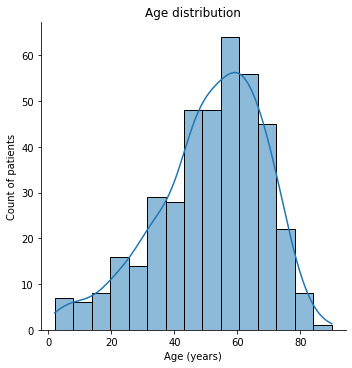

In [45]:
# Make the basic plot
sns.displot(data=df['age'], kde=True)

# Format axis lables 
plt.title('Age distribution')
plt.ylabel('Count of patients')
plt.xlabel('Age (years)')
plt.show()  # Print it to the notebook

#### Exercise

> Plot *only* the kde plot of age (no histogram). __HINT__: Check the online [`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)documentation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


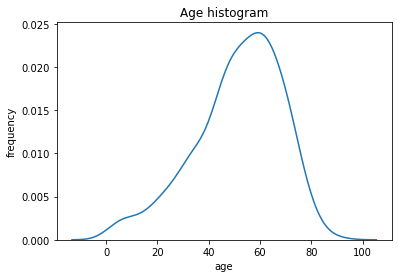

In [48]:
sns.distplot(df.age, hist=False)
plt.title('Age histogram')
plt.ylabel('frequency')
plt.show()

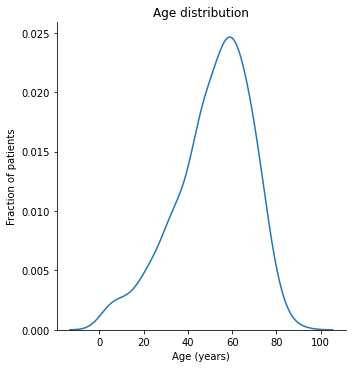

In [ ]:
# Write your code here.

# -------------------



# -------------------

###`displot` with histogram only 
It is also useful to plot histograms over different slices of the data. For example, how does the age histogram for patients with CKD compare to patients without CKD?

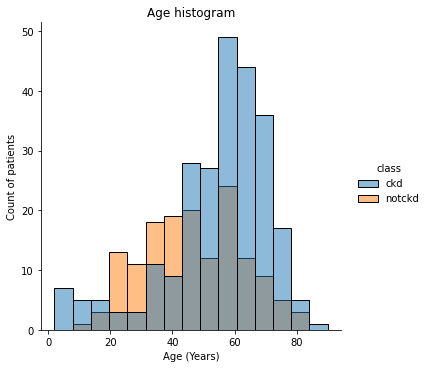

In [ ]:
sns.displot(data=df,x = 'age', hue = 'class', kind='hist')

# Format plot area 
plt.title('Age histogram')
plt.ylabel('Count of patients')
plt.xlabel('Age (Years)')
plt.show()


#### Exercise
> 1. What does this plot say about age with respect to CKD? Would age make a good feature in a predictive model?
>> People with CKD are generally older. Age would probably be a good feature in a model that predicts CKD
> 2. Now show the KDE plots of the blood pressure of CKD vs Not CKD patients and comment on how useful blood preasure may be in a model that predicts CKD.

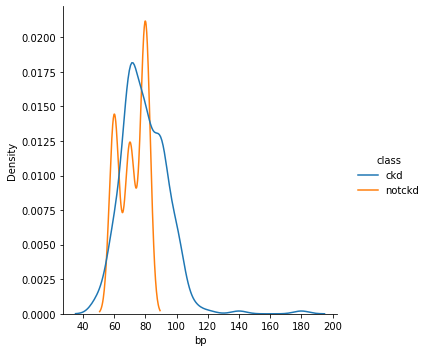

In [50]:
sns.displot(data=df,x = 'bp', hue = 'class', kind='kde')

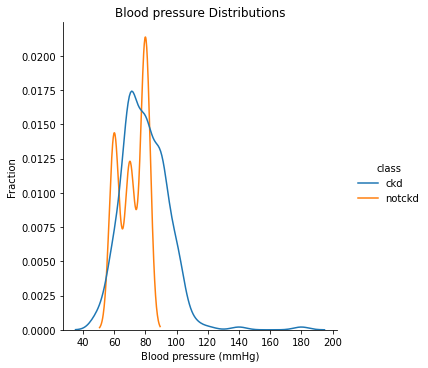

In [ ]:
# Write your code here.

# -------------------


# -------------------

###Using `countplot` (bar plots)
Discrete or categorical data can be represented using bar plots. Below we show the number of patients for each combination of class and urine specific gravity.

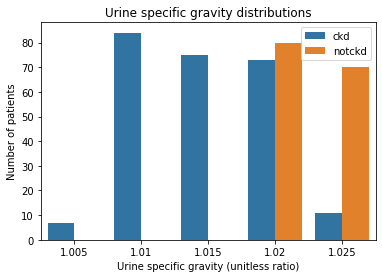

In [ ]:
# Plot data
sns.countplot(data=df, x='sg',hue='class')

# Format plot area
plt.legend()
plt.title('Urine specific gravity distributions')
plt.ylabel('Number of patients')
plt.xlabel('Urine specific gravity (unitless ratio)')
plt.show()

####Exercise 
1.  What does this plot say about these two features in relation to each other?
>> 


### Using `FacetGrid`

Facet grids are useful for visualizing distributions across two different categorical features, or for when there are too many combinations of data to visualize on a single graph. The grid below displays the age distributions for all combinations of class and urine specific gravity. Note, here we use the [`histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function.

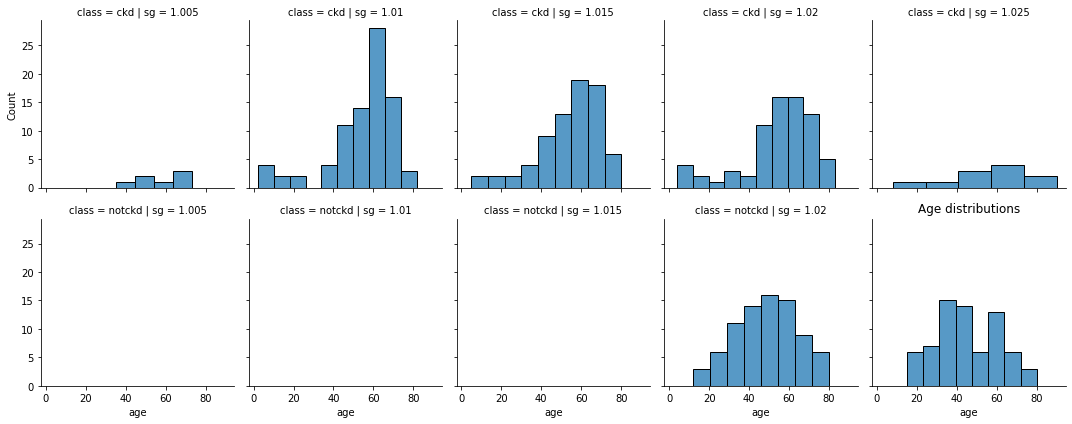

In [ ]:
# Create facet grid and then fill it in with histograms
g = sns.FacetGrid(data=df, row='class', col='sg')
g.map(sns.histplot, 'age')

# Format plot area
plt.title('Age distributions')
plt.show()

### Using `heatmap`
Heat maps are another great tool for visualizing differences between features. For example, if you want to quickly see the correlation of multiple pairs of variables then you could filter the dataframe to only include the features you are interested in and apply the `corr` method to it. Below we can see the correlation of the first eight variables in `df`.

          age        bp        sg        al        su       bgr        bu  \
age  1.000000  0.136316 -0.160374  0.085918  0.186750  0.230731  0.194291   
bp   0.136316  1.000000 -0.166980  0.123518  0.189561  0.150180  0.180841   
sg  -0.160374 -0.166980  1.000000 -0.479962 -0.292053 -0.299413 -0.244995   
al   0.085918  0.123518 -0.479962  1.000000  0.287751  0.293150  0.347418   
su   0.186750  0.189561 -0.292053  0.287751  1.000000  0.627002  0.126897   
bgr  0.230731  0.150180 -0.299413  0.293150  0.627002  1.000000  0.118859   
bu   0.194291  0.180841 -0.244995  0.347418  0.126897  0.118859  1.000000   
sc   0.133985  0.143184 -0.171998  0.161310  0.096434  0.068886  0.581517   

           sc  
age  0.133985  
bp   0.143184  
sg  -0.171998  
al   0.161310  
su   0.096434  
bgr  0.068886  
bu   0.581517  
sc   1.000000  


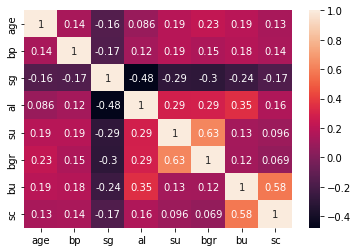

In [ ]:
# Calculate correlation coefficents
corr_df = df.iloc[:,:8].corr()
print(corr_df)  # Print correlation coefficents to notebook

# Plot correlation coefficents in heat map
sns.heatmap(corr_df,annot=True)
plt.show()

#### Exercise
1. Why does the diagonal of the heat map contain 1s
>> Because each feature is perfectly correlated with itself. The 1s should be ignored when doing any analysis.
2. Which two features are most correlated? 
>> SU and BGR 


### Using `joinplot`
The past few plots before the heatmaps (i.e., `FacetGrid`, `countplot`) displayed data for continuous variables (e.g., age) stratified by one or two categorical variables (e.g., class, specific gravity). However, as you have likely done in other classes, there may be times were we want to compare multiple continuous variables. The seaborn `jointplot` function allows you to visualize the scatterplot of two continuous variables along with their respective distributions. The `jointplot` function offers many interesting visualizations that are useful in a variety of situations, and you can read more about it in the seaborn documentation [here](https://seaborn.pydata.org/generated/seaborn.jointplot.html). Additionally, you can annotate the resulting graph with values like the output of statistical tests (e.g., [Pearson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)).

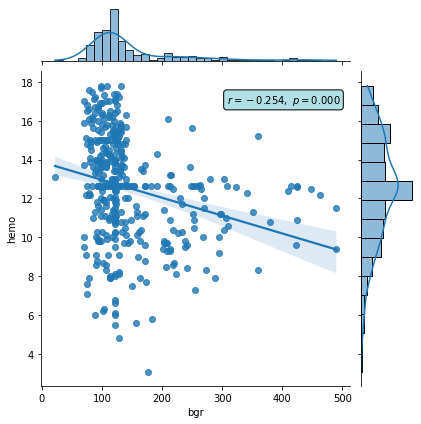

In [ ]:
# Get some statistics on the data
r, p = stats.pearsonr(df['bgr'], df['hemo'])

# Plot the data in a joint plot
j = sns.jointplot(data=df,  # Data frame to plot
                  x='bgr',  # x-axis data
                  y='hemo',  # y-axis data
                  kind='reg')

# Annotate the plot with statistics
j.ax_joint.annotate(f'$r = {r:.3f},\ p = {p:.3f}$',  # Text annotation
                    xy=(0.6, 0.9),  # xy coordinates for annotation
                    xycoords='axes fraction',  # coordinates are fractions
                    bbox={'boxstyle': 'round',  # round corners of box
                          'fc': 'powderblue'}  # fill box with powderblue colour
                    )

# Show plot
plt.show()


####Exercise

Create a visualization displaying the following combination of variables and comment on your findings. 

1.   Blood urea
2.   Albumin and anemia
3.   Blood urea and anemia
3.   Blood urea, albumin and anemia
4.   Blood urea and age.




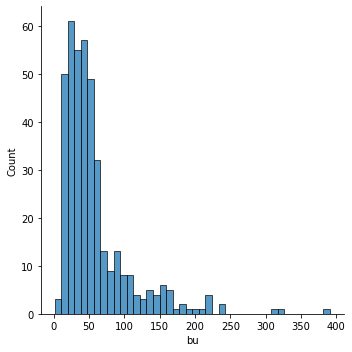

In [51]:
sns.displot(df.bu)

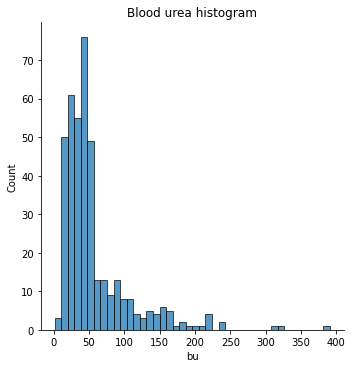

In [ ]:
### Question 1

# Write your code here.

# -------------------


# -------------------

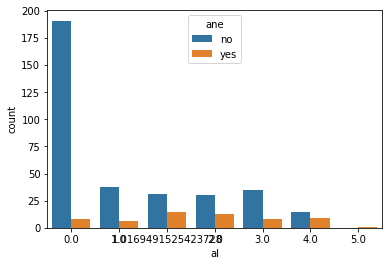

In [52]:
sns.countplot(data=df,x='al',hue='ane')

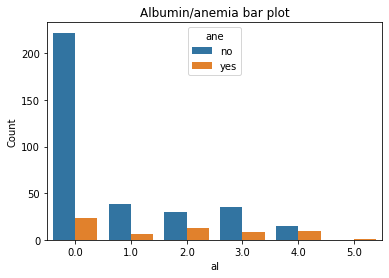

In [ ]:
### Question 2

# Write your code here.

# -------------------

# -------------------

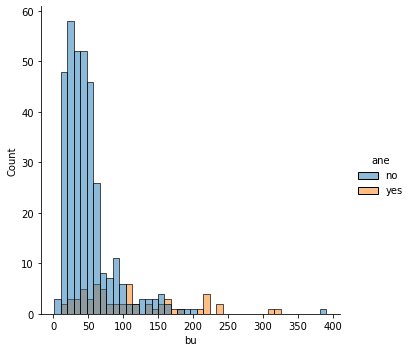

In [54]:
sns.displot(data=df,x='bu',hue='ane')

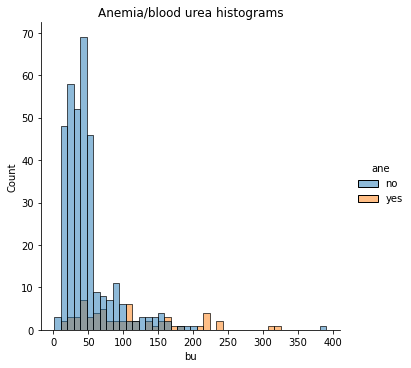

In [ ]:
### Question 3

# Write your code here.

# -------------------



# -------------------

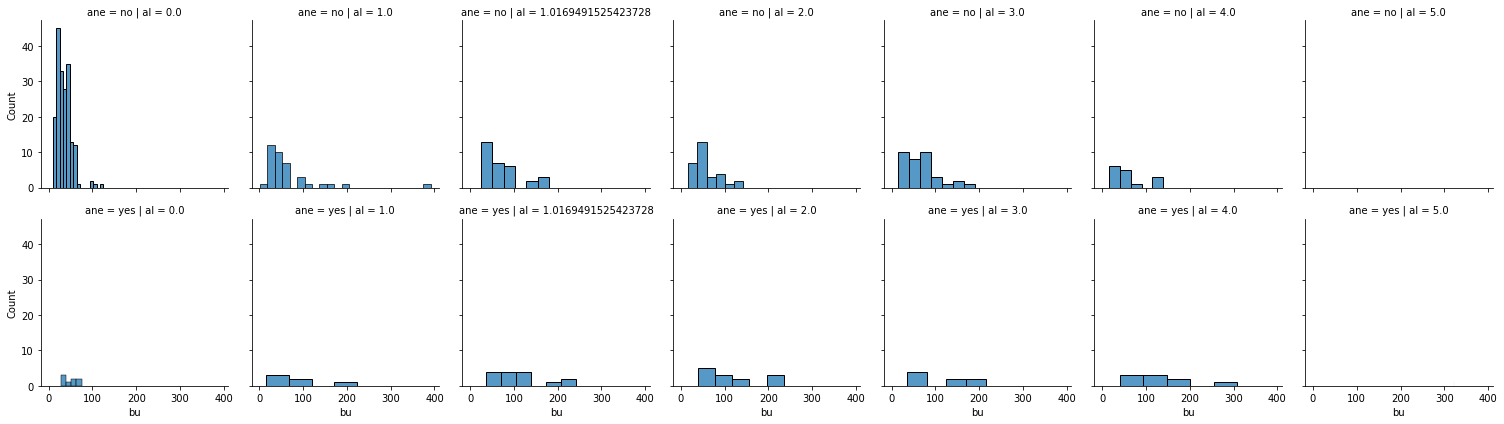

In [57]:
g = sns.FacetGrid(data=df, row='ane', col='al')
g.map(sns.histplot, "bu",kde=False)
plt.show()

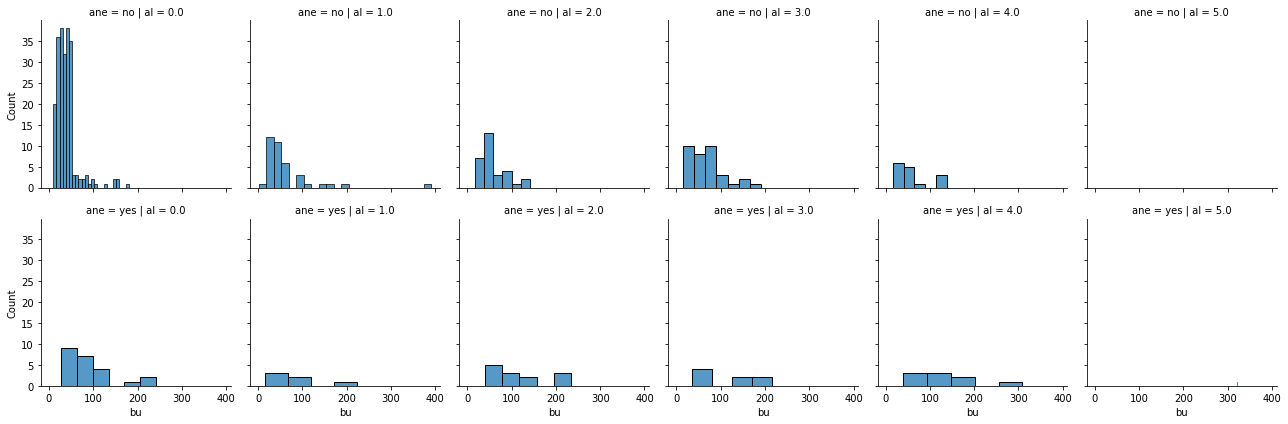

In [ ]:
### Question 4

# Write your code here.

# -------------------


# -------------------

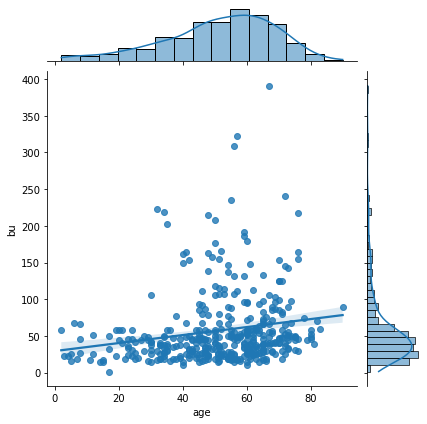

In [63]:
j = sns.jointplot(data=df, x='age',y='bu',kind='reg')
plt.show()

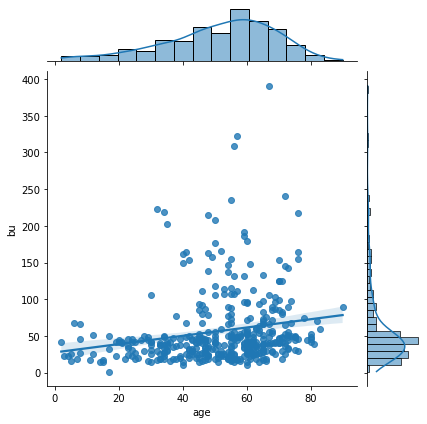

In [ ]:
### Question 5

# Write your code here.

# -------------------



# -------------------

# Coding a simple predictive model
In this section, we modify the data so that it can be used to build a _very_ simple model. We will cover the details of the model in the next lab. The purpose of this section is to illustrate how the data can be used to build a model.


## Encoding categical data with numbers
Mathematical models will not support categorical/object features; everything must be converted into numbers. To do this, we convert all binary categorical columns into boolean columns. We can use the replace function and our own mapping convention (stored as a dictionary) to accomplish this as follows:

In [ ]:
# Make a copy of df for this seciton of the lab
df_modified = df.copy()

# Define a dictionary that maps strings to booleans
mapping_dict = {"no": 0, "yes": 1,  # Boolean replacements for no/yes
                "abnormal":0, "normal":1}  # Boolean replacements for abnormal/normal

# Apply the mapping dict to the data
df_modified.replace(mapping_dict, inplace=True)
df_modified.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,notpresent,notpresent,1,1,0,good,0,0,ckd
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,notpresent,notpresent,0,0,0,good,0,0,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,notpresent,notpresent,0,1,0,poor,0,1,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,present,notpresent,1,0,0,poor,1,1,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,notpresent,notpresent,0,0,0,good,0,0,ckd


We can see that all instances of "no" and "yes" in the `df` were replaced with 0 and 1, respecitly. Similarly, "abnormal" and "normal" were replaced with 0 and 1, respectively.

### Exercise

> Create your own mapping convention for the remaining columns (you will need three more sets of binary values to convert all of the remaining categorical values into binary values). **Hint**: You can use the "value_counts()" method on a column to see what values it holds!

In [ ]:
def get_most_frequent_value(my_column):
    return my_column.value_counts().index[0]

mf_per_column = data_final[kidney_columns_sorted[14:-1]].apply(get_most_frequent_value, axis=0)
mf_per_column

In [68]:
df['pcc'].value_counts()

notpresent    358
present        42
Name: pcc, dtype: int64

In [ ]:
mapping_dict = {"no": 0, "yes": 1,  # Boolean replacements for no/yes
                "abnormal":0, "normal":1}  # Boolean replacements for abnormal/normal

# Apply the mapping dict to the data
df_modified.replace(mapping_dict, inplace=True)
df_modified.head()

In [ ]:
# Write your code here. 

# -------------------



# -------------------

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,0,0,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,0,0,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,0,0,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,0,1,0,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,0,0,0,0,0,1,0,0,1


## Train the model
Now that our categorical features have all been encoded as 0's and 1's we can code a model that predicts whether or not a patient has CKD. We will cover how this model works in the next lab. 

In [ ]:
# Import class that will make the simple predictive model
from sklearn.linear_model import LogisticRegression 

# Get the list of features for our model
X = df_modified.drop('class', axis=1)
y = df_modified['class']

# Initialize model
logreg = LogisticRegression(solver='liblinear')

# Fit model
logreg.fit(X, y) 

# Evaluate the model score (i.e., how well it performs)
score = logreg.score(X, y)
print(f'The model achieved a score of {score}. We learn about what this score means in the next lab')

The model achieved a score of 0.985. We learn about what this score means in the next lab


We trained a model that achieves a score of 0.985, which is the accuracy of the model (i.e., how often the model properly classifies a patient with CKD). However, there are still many questions we can't answer: 

> 1. Is this the best model?
> 2. How will this model perform on data it hasn't seen before? 
> 3. Is there another way to evaluate the quality of this model?

We'll try to answer these questions and more in the next lab where we apply analytics to a problem in professional basketball.